In [37]:
import curated, rawdata, primary 
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
DB_PATH = '/home/naga/FintelligenceData/MetaTrader_M1.db'
petr3_raw = rawdata.RawData('PETR3',DB_PATH)
petr3_raw.df = petr3_raw.time_window(start = pd.Timestamp('2016-01-20 10:15:00'),stop = pd.Timestamp('2020-12-20 10:15:00'),time_step=60)
parameters = {'ModelParameters':{}, 'OperationParameters':{'SL': 0.01, 'TP': 0.08, 'IH': 3}}
model = primary.PrimaryModel(petr3_raw,'cusum',parameters)

In [44]:
events = model.events_classical_filter(0.05)

In [45]:
df = model.feature_data.df_curated
df['Trigger'] = events['Trigger']
buy = df[df['Trigger']==1][['Close']]
sell = df[df['Trigger']==-1][['Close']]

<AxesSubplot:xlabel='DateTime'>

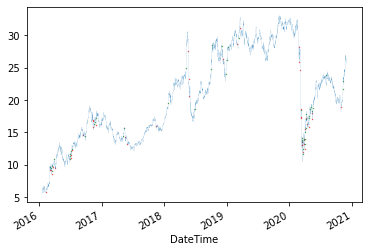

In [46]:
plt.scatter(buy.index, buy['Close'], c='g', s = 0.1)
plt.scatter(sell.index, sell['Close'], c='r', s = 0.1)
df.Close.plot(linewidth = 0.1)